In [259]:
import pandas as pd

In [260]:
df=pd.read_csv("C:\\Users\\ALL\\Desktop\\JN\\traffic.csv",low_memory=False)          #load the data set into python

In [263]:
print(df.head())

                                     CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...              NaN   
3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...              NaN   
4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...              NaN   

               CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  08/18/2023 12:50:00 PM                  15                  OTHER   
1  07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
2  08/18/2023 05:58:00 PM                  30            NO CONTROLS   
3  11/26/2019 08:38:00 AM                  25            NO CONTROLS   
4  08/18/2023 10:45:00 AM                  20            NO CONTROLS   

       DEVICE_CONDITION WEATHER_CONDITION LIGHTING_CONDITION  \
0  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   


In [264]:
df.columns = df.columns.str.lower()  # Convert to lowercase  Standardize the column names

In [265]:
print(df[df['crash_date'].isna()])

Empty DataFrame
Columns: [crash_record_id, crash_date_est_i, crash_date, posted_speed_limit, traffic_control_device, device_condition, weather_condition, lighting_condition, first_crash_type, trafficway_type, lane_cnt, alignment, roadway_surface_cond, road_defect, report_type, crash_type, intersection_related_i, not_right_of_way_i, hit_and_run_i, damage, date_police_notified, prim_contributory_cause, sec_contributory_cause, street_no, street_direction, street_name, beat_of_occurrence, photos_taken_i, statements_taken_i, dooring_i, work_zone_i, work_zone_type, workers_present_i, num_units, most_severe_injury, injuries_total, injuries_fatal, injuries_incapacitating, injuries_non_incapacitating, injuries_reported_not_evident, injuries_no_indication, injuries_unknown, crash_hour, crash_day_of_week, crash_month, latitude, longitude, location]
Index: []

[0 rows x 48 columns]


In [266]:
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')    #convert date to appropriate format


In [267]:
directions = {
    'N': 'NORTH',
    'S': 'SOUTH',
    'E': 'EAST',
    'W': 'WEST'
}


In [268]:
df['street_direction'] = df['street_direction'].replace(directions, regex=True)  #standardize categorical values

In [269]:
print(df.columns)

Index(['crash_record_id', 'crash_date_est_i', 'crash_date',
       'posted_speed_limit', 'traffic_control_device', 'device_condition',
       'weather_condition', 'lighting_condition', 'first_crash_type',
       'trafficway_type', 'lane_cnt', 'alignment', 'roadway_surface_cond',
       'road_defect', 'report_type', 'crash_type', 'intersection_related_i',
       'not_right_of_way_i', 'hit_and_run_i', 'damage', 'date_police_notified',
       'prim_contributory_cause', 'sec_contributory_cause', 'street_no',
       'street_direction', 'street_name', 'beat_of_occurrence',
       'photos_taken_i', 'statements_taken_i', 'dooring_i', 'work_zone_i',
       'work_zone_type', 'workers_present_i', 'num_units',
       'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication',
       'injuries_unknown', 'crash_hour', 'crash_day_of_week', 'crash_month',
       'latitude', 

In [270]:
print(df.duplicated().sum())                   #Check the number of duplicates

0


In [271]:
print(df.columns)

Index(['crash_record_id', 'crash_date_est_i', 'crash_date',
       'posted_speed_limit', 'traffic_control_device', 'device_condition',
       'weather_condition', 'lighting_condition', 'first_crash_type',
       'trafficway_type', 'lane_cnt', 'alignment', 'roadway_surface_cond',
       'road_defect', 'report_type', 'crash_type', 'intersection_related_i',
       'not_right_of_way_i', 'hit_and_run_i', 'damage', 'date_police_notified',
       'prim_contributory_cause', 'sec_contributory_cause', 'street_no',
       'street_direction', 'street_name', 'beat_of_occurrence',
       'photos_taken_i', 'statements_taken_i', 'dooring_i', 'work_zone_i',
       'work_zone_type', 'workers_present_i', 'num_units',
       'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication',
       'injuries_unknown', 'crash_hour', 'crash_day_of_week', 'crash_month',
       'latitude', 

In [272]:
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')

In [273]:
df = df.dropna(subset=['crash_date'])

In [274]:
start_date = pd.to_datetime('2023-01-01')                                                              #Filter rows that are not in the specified date limit
end_date = pd.to_datetime('2023-12-31')
df = df[(df['crash_date'] >= start_date) & (df['crash_date'] <= end_date)]

In [275]:
df = df.drop_duplicates(subset=['crash_date'], keep='first')                       #drop duplicate date

In [276]:
abbreviations = {
    'AVE': 'AVENUE',
    'ST': 'STREET',
    'DR': 'DRIVE',
    'RD': 'ROAD',
    'BLVD': 'BOULEVARD',
    'LN': 'LANE',
    'HWY': 'HIGHWAY',
    'PKWY': 'PARKWAY'
}

In [277]:
# Replace abbreviations
df['street_name'] = df['street_name'].replace(abbreviations, regex=True)      #standardize categorical values

In [278]:
print(df[df.duplicated()])                     #display some of the duplicate rows

Empty DataFrame
Columns: [crash_record_id, crash_date_est_i, crash_date, posted_speed_limit, traffic_control_device, device_condition, weather_condition, lighting_condition, first_crash_type, trafficway_type, lane_cnt, alignment, roadway_surface_cond, road_defect, report_type, crash_type, intersection_related_i, not_right_of_way_i, hit_and_run_i, damage, date_police_notified, prim_contributory_cause, sec_contributory_cause, street_no, street_direction, street_name, beat_of_occurrence, photos_taken_i, statements_taken_i, dooring_i, work_zone_i, work_zone_type, workers_present_i, num_units, most_severe_injury, injuries_total, injuries_fatal, injuries_incapacitating, injuries_non_incapacitating, injuries_reported_not_evident, injuries_no_indication, injuries_unknown, crash_hour, crash_day_of_week, crash_month, latitude, longitude, location]
Index: []

[0 rows x 48 columns]


In [279]:
#df_no_duplicates = df.drop_duplicates(subset=['injuries_incapacitating', 'crash_date'])    #Remove duplicates on specific columns


In [280]:
columns_to_drop = ['statements_taken_i', 'first_crash_type','lane_cnt','photos_taken_i','crash_date_est_i','dooring_i','work_zone_i','work_zone_type','workers_present_i','num_units','crash_record_id','latitude','longitude','location','injuries_unknown','most_severe_injury']


In [281]:
print(df['injuries_fatal'].isnull().sum())                                  #inspect the missing values

192


In [282]:
print(df[df['injuries_fatal'].isnull()])

                                          crash_record_id crash_date_est_i  \
166     b04f80dbab0e1aca77264c29988808826526b54f27dda6...              NaN   
10378   ce824977beedf8829cf70fd8fe916676da2ca4b620f0cb...              NaN   
12797   03b50c69fdcb561ca32210add21826ed406f7b67c10c02...              NaN   
13124   9498937e37edb33d6346e64f9a2864d1f415e442947f26...              NaN   
14978   1bde0316de4b23649165531259d41c89a11294bcbb888a...                Y   
...                                                   ...              ...   
858445  f1a6f41f53e763a75f97505a48b148de8b29eef4a73ca0...              NaN   
864747  f37627f6a2d6f56d95a894e5209e639a82a781f17fdbe9...              NaN   
891616  fb360d8534431f8937f4cf5a038b01ea2ce2241b595386...              NaN   
898141  fd1c5cdae925a0507050b46e67d4a35330a19f6a79ff50...              NaN   
901303  fe05be2852f0284c398aa0857b70897c1e43445b1e35b3...              NaN   

                crash_date  posted_speed_limit traffic_control_

In [283]:
df['injuries_fatal'] = df['injuries_fatal'].fillna(0)                            #Filling the missing values

In [284]:
print(df['injuries_fatal'].isnull().sum())     

0


In [285]:
print(df[df['injuries_fatal'].isnull()])

Empty DataFrame
Columns: [crash_record_id, crash_date_est_i, crash_date, posted_speed_limit, traffic_control_device, device_condition, weather_condition, lighting_condition, first_crash_type, trafficway_type, lane_cnt, alignment, roadway_surface_cond, road_defect, report_type, crash_type, intersection_related_i, not_right_of_way_i, hit_and_run_i, damage, date_police_notified, prim_contributory_cause, sec_contributory_cause, street_no, street_direction, street_name, beat_of_occurrence, photos_taken_i, statements_taken_i, dooring_i, work_zone_i, work_zone_type, workers_present_i, num_units, most_severe_injury, injuries_total, injuries_fatal, injuries_incapacitating, injuries_non_incapacitating, injuries_reported_not_evident, injuries_no_indication, injuries_unknown, crash_hour, crash_day_of_week, crash_month, latitude, longitude, location]
Index: []

[0 rows x 48 columns]


In [286]:
if not df['injuries_incapacitating'].dropna().empty:                                                #impute values using mode
    mode_value = df['injuries_incapacitating'].mode()[0]
else:
    mode_value = 'Unknown'  # Replace 'Unknown' with a suitable default value

df['injuries_incapacitating'] = df['injuries_incapacitating'].fillna(mode_value)

In [287]:
if not df['beat_of_occurrence'].dropna().empty:
    mode_value = df['beat_of_occurrence'].mode()[0]
else:
    mode_value = 'Unknown'  # Replace 'Unknown' with a suitable default value

df['beat_of_occurrence'] = df['beat_of_occurrence'].fillna(mode_value)

In [288]:
print(df['injuries_incapacitating'].value_counts())

injuries_incapacitating
0.0     71913
1.0      1292
2.0       145
3.0        24
4.0         9
5.0         6
10.0        1
8.0         1
Name: count, dtype: int64


In [289]:
if not df['injuries_no_indication'].dropna().empty:
    mode_value = df['injuries_no_indication'].mode()[0]
else:
    mode_value = 'Unknown'  # Replace 'Unknown' with a suitable default value

df['injuries_no_indication'] = df['injuries_no_indication'].fillna(mode_value)

In [290]:
print(df['injuries_incapacitating'].value_counts())

injuries_incapacitating
0.0     71913
1.0      1292
2.0       145
3.0        24
4.0         9
5.0         6
10.0        1
8.0         1
Name: count, dtype: int64


In [291]:
if not df['injuries_reported_not_evident'].dropna().empty:                                #impute values using median
    median_value = df['injuries_reported_not_evident'].median()
else:
    median_value = 0  # Replace 0 with a suitable default value

df['injuries_reported_not_evident'] = df['injuries_reported_not_evident'].fillna(median_value)

In [292]:
print(df['injuries_reported_not_evident'].value_counts())

injuries_reported_not_evident
0.0     69201
1.0      3202
2.0       706
3.0       174
4.0        70
5.0        23
6.0         6
7.0         3
8.0         2
9.0         2
11.0        1
10.0        1
Name: count, dtype: int64


In [293]:
if not df['injuries_unknown'].dropna().empty:
    median_value = df['injuries_unknown'].median()
else:
    median_value = 0  # Replace 0 with a suitable default value

df['injuries_unknown'] = df['injuries_unknown'].fillna(median_value)

In [294]:
print(df['injuries_unknown'].value_counts())

injuries_unknown
0.0    73391
Name: count, dtype: int64


In [295]:
if not df['injuries_non_incapacitating'].dropna().empty:
    median_value = df['injuries_non_incapacitating'].median()
else:
    median_value = 0  # Replace 0 with a suitable default value

df['injuries_non_incapacitating'] = df['injuries_non_incapacitating'].fillna(median_value)

In [296]:
print(df['injuries_non_incapacitating'].value_counts())

injuries_non_incapacitating
0.0     65839
1.0      5708
2.0      1264
3.0       372
4.0       126
5.0        45
6.0        22
7.0         6
8.0         4
10.0        3
12.0        1
15.0        1
Name: count, dtype: int64


In [297]:
if not df['injuries_total'].dropna().empty:
    median_value = df['injuries_total'].median()
else:
    median_value = 0  # Replace 0 with a suitable default value

df['injuries_total'] = df['injuries_total'].fillna(median_value)

In [298]:
print(df['injuries_non_incapacitating'].value_counts())

injuries_non_incapacitating
0.0     65839
1.0      5708
2.0      1264
3.0       372
4.0       126
5.0        45
6.0        22
7.0         6
8.0         4
10.0        3
12.0        1
15.0        1
Name: count, dtype: int64


In [299]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [300]:
if 'street_name' in df.columns:                                                            #applying ffill
    df['street_name'] = df['street_name'].fillna(method='ffill')

In [301]:
if 'street_direction' in df.columns:
    df['street_direction'] = df['street_direction'].fillna(method='bfill')                             #applying bfill

In [302]:
df['report_type']=df['report_type'].fillna('Unknown')

In [303]:
df['intersection_related_i']=df['intersection_related_i'].fillna('Unknown')

In [304]:
df['not_right_of_way_i']=df['not_right_of_way_i'].fillna('Unknown')

In [305]:
df['hit_and_run_i']=df['hit_and_run_i'].fillna('Unknown')

In [306]:
df['most_severe_injury']=df['most_severe_injury'].fillna('Unknown')

In [307]:
print(df.isnull().sum())

crash_record_id                      0
crash_date_est_i                 68949
crash_date                           0
posted_speed_limit                   0
traffic_control_device               0
device_condition                     0
weather_condition                    0
lighting_condition                   0
first_crash_type                     0
trafficway_type                      0
lane_cnt                         73386
alignment                            0
roadway_surface_cond                 0
road_defect                          0
report_type                          0
crash_type                           0
intersection_related_i               0
not_right_of_way_i                   0
hit_and_run_i                        0
damage                               0
date_police_notified                 0
prim_contributory_cause              0
sec_contributory_cause               0
street_no                            0
street_direction                     0
street_name              

In [308]:
df_cleaned = df.drop(columns_to_drop, axis=1)

In [309]:
print(df_cleaned.columns)

Index(['crash_date', 'posted_speed_limit', 'traffic_control_device',
       'device_condition', 'weather_condition', 'lighting_condition',
       'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect',
       'report_type', 'crash_type', 'intersection_related_i',
       'not_right_of_way_i', 'hit_and_run_i', 'damage', 'date_police_notified',
       'prim_contributory_cause', 'sec_contributory_cause', 'street_no',
       'street_direction', 'street_name', 'beat_of_occurrence',
       'injuries_total', 'injuries_fatal', 'injuries_incapacitating',
       'injuries_non_incapacitating', 'injuries_reported_not_evident',
       'injuries_no_indication', 'crash_hour', 'crash_day_of_week',
       'crash_month'],
      dtype='object')


In [311]:
df_cleaned.to_csv(r'C:\\Users\\ALL\\Desktop\\JN\\tra1.csv', index=False)

In [312]:
import seaborn as sns

In [313]:
import pandas as pd

In [314]:
import matplotlib.pyplot as plt 

In [315]:
from scipy.stats import zscore

In [316]:
import numpy as np

In [317]:
df1=pd.read_csv("C:\\Users\\ALL\\Desktop\\JN\\tra1.csv",low_memory=False) 

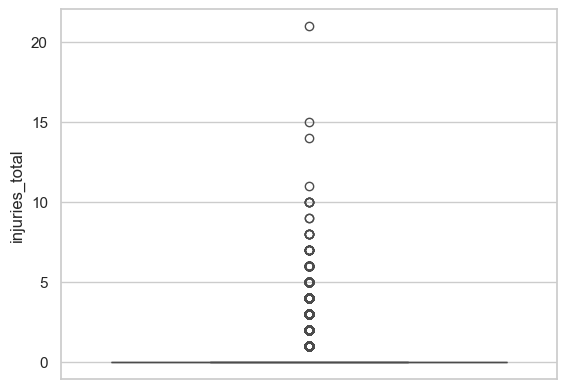

In [318]:
sns.boxplot(df1['injuries_total'])
plt.show()

In [319]:
Q1=df1['injuries_fatal'].quantile(0.25)
Q3=df1['injuries_fatal'].quantile(0.75)
IQR=Q3-Q1

In [320]:
outliers = df1[(df1['injuries_fatal'] < (Q1 - 1.5 * IQR)) | (df1['injuries_fatal'] > (Q3 + 1.5 * IQR))]   #Define outliers


In [321]:
df1['injuries_fatal'] = np.where(df1['injuries_fatal'] > (Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, df1['injuries_fatal'])    #Address outliers


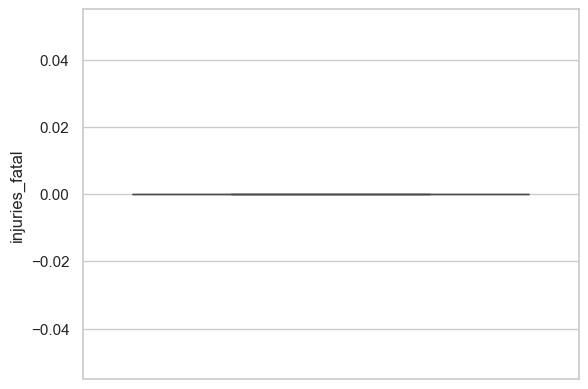

In [322]:
sns.boxplot(df1['injuries_fatal'])
plt.show()

In [323]:
import pandas as pd

In [324]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [325]:
data=pd.read_csv("C:\\Users\\ALL\\Desktop\\JN\\tra1.csv",low_memory=False)

In [326]:
# 1.Number of Accidents per month in Chicago

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
# Convert the collision_date column to datetime
data["crash_date"] = pd.to_datetime(data["crash_date"])

In [329]:
# Extract the month from the collision date
data["month"] = data["crash_date"].dt.month
data["month_name"] = data["crash_date"].dt.month_name()


In [330]:
# Count the number of collisions per month
accidents_per_month = data["month_name"].value_counts().reindex([
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
])


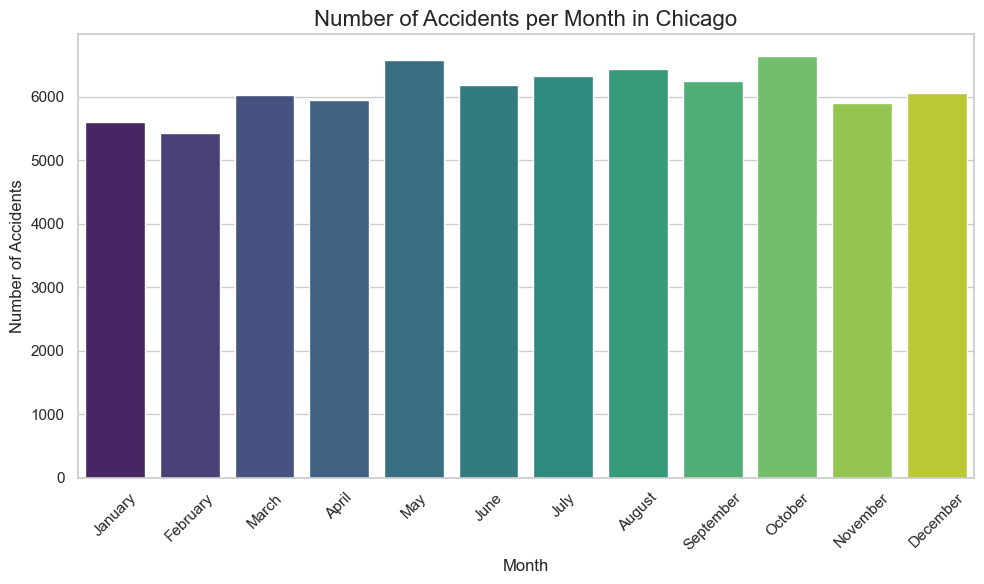

In [331]:
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_per_month.index, y=accidents_per_month.values, palette="viridis")
plt.title("Number of Accidents per Month in Chicago", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [332]:
# 2.Number of Crash count by Weather Condition in Chicago

In [333]:
print(data[["crash_date", "weather_condition"]].head())

           crash_date weather_condition
0 2023-08-18 12:50:00             CLEAR
1 2023-07-29 14:45:00             CLEAR
2 2023-08-18 17:58:00             CLEAR
3 2023-08-18 10:45:00             CLEAR
4 2023-07-29 13:00:00             CLEAR


In [334]:
# Group by weather condition and count crashes
weather_crashes = data.groupby("weather_condition").size().reset_index(name="crash_count")

# Sort by crash_count for better visualization
weather_crashes = weather_crashes.sort_values(by='crash_count', ascending=False)

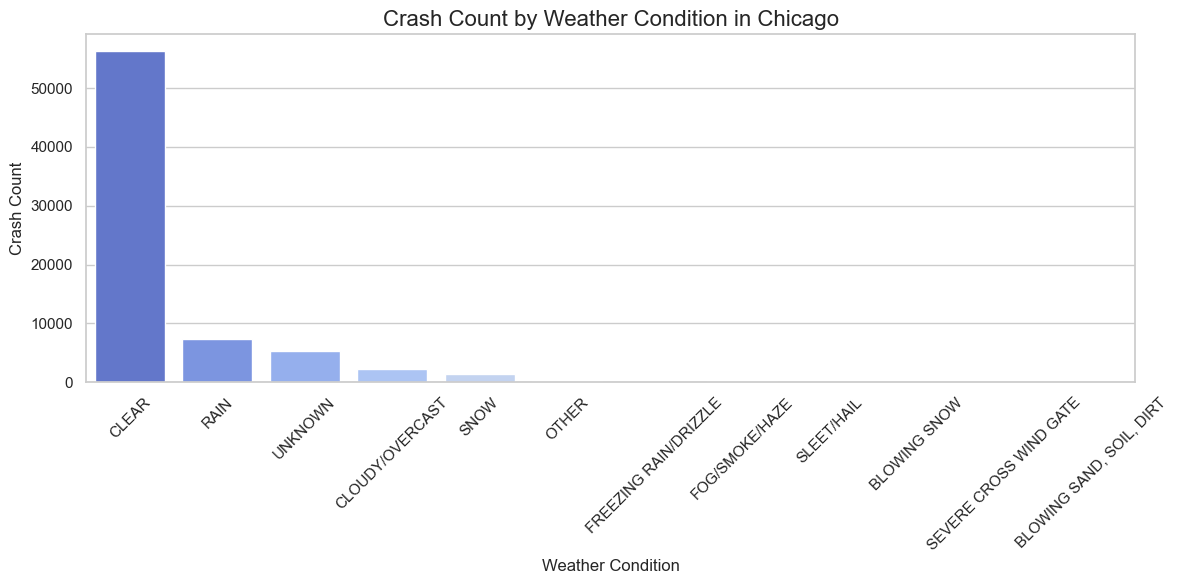

In [335]:
plt.figure(figsize=(12, 6))
sns.barplot(data=weather_crashes, x="weather_condition", y="crash_count", palette="coolwarm")
plt.title("Crash Count by Weather Condition in Chicago", fontsize=16)
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Crash Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [336]:
# 3.Number of accidents per hour of the day in Chicago

In [337]:
# Convert the time column to a datetime object
data["crash_date"] = pd.to_datetime(data["crash_date"], format="%H:%M")

In [338]:
# Extract the hour of the day
data["hour"] = data["crash_date"].dt.hour

In [339]:
# Count the number of accidents by hour
accidents_per_hour = data["hour"].value_counts().sort_index()

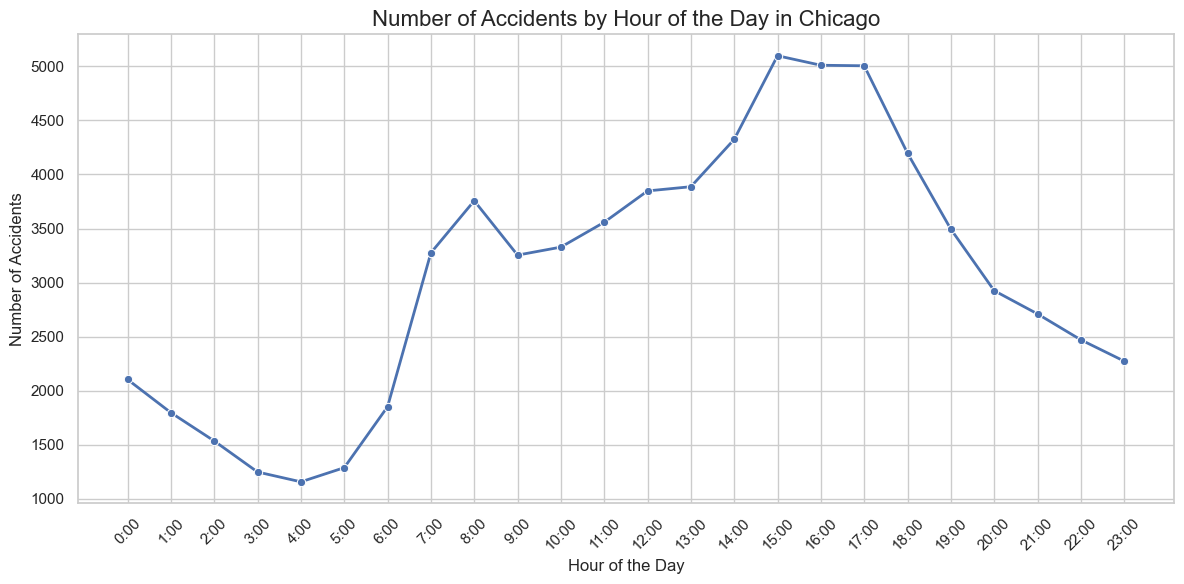

In [340]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the line plot
sns.lineplot(x=accidents_per_hour.index, y=accidents_per_hour.values, marker='o', color='b', linewidth=2)

# Add title and labels
plt.title("Number of Accidents by Hour of the Day in Chicago", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)

# Customize x-axis labels for better readability
plt.xticks(range(0, 24), labels=[f"{h}:00" for h in range(0, 24)], rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [341]:
# 4. Impact of Road Condition on Collisions in Chicago

In [342]:
# Check for missing values in the road_condition column
print(data["roadway_surface_cond"].isnull().sum())

0


In [343]:
# Standardize the values (optional, in case of inconsistent naming)
data["roadway_surface_cond"] = data["roadway_surface_cond"].str.strip().str.lower()

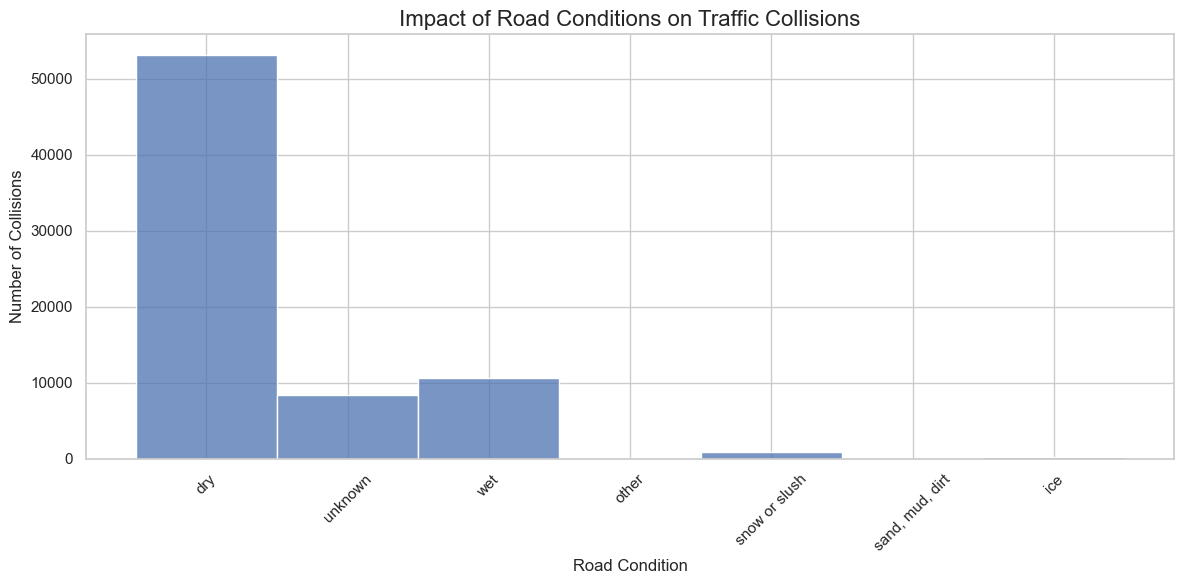

In [344]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data=data, x="roadway_surface_cond", discrete=True, color="b", kde=False, bins=len(data["roadway_surface_cond"].unique()))

# Customize the title and labels
plt.title("Impact of Road Conditions on Traffic Collisions", fontsize=16)
plt.xlabel("Road Condition", fontsize=12)
plt.ylabel("Number of Collisions", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [345]:
# 5.Distribution of Fatal Injuries per day of the week in January

In [346]:
print(data[["crash_date", "injuries_fatal"]].head())

           crash_date  injuries_fatal
0 2023-08-18 12:50:00             0.0
1 2023-07-29 14:45:00             0.0
2 2023-08-18 17:58:00             0.0
3 2023-08-18 10:45:00             0.0
4 2023-07-29 13:00:00             0.0


In [347]:
# Convert the collision_date column to datetime
data["crash_date"] = pd.to_datetime(data["crash_date"])

In [348]:
# Extract the month and day of the week from the collision date
data["crash_month"] = data["crash_date"].dt.month
data["crash_day_of_week"] = data["crash_date"].dt.day_name()  # Get day of the week (e.g., Monday, Tuesday)

In [349]:
# Filter the data for accidents in January (month = 1)
january_data = data[data["month"] == 1]

In [350]:
# Check if 'fatal_injury_count' exists or is available in your dataset
fatal_accidents = january_data[january_data["injuries_fatal"] > 0]

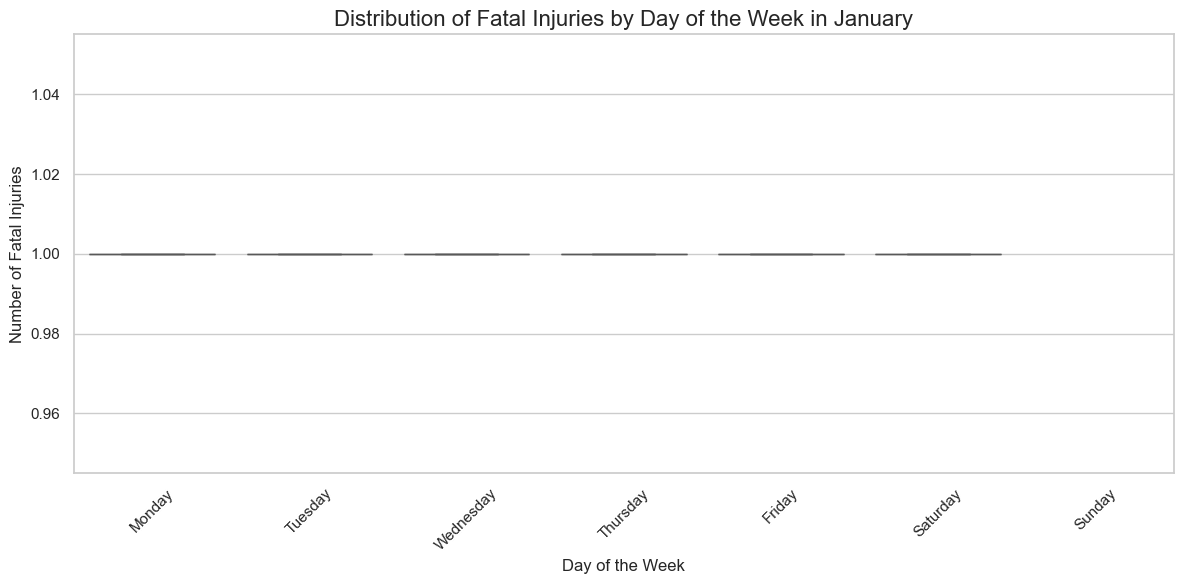

In [351]:
# Create the box plot with correct ordering for the days of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x="crash_day_of_week", y="injuries_fatal", data=fatal_accidents, palette="coolwarm", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Customize the title and labels
plt.title("Distribution of Fatal Injuries by Day of the Week in January", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Fatal Injuries", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [352]:
# 6.Distribution of the Number of crashes per Lighting Condition

In [353]:
print(data['lighting_condition'].unique())

['DAYLIGHT' 'DARKNESS, LIGHTED ROAD' 'UNKNOWN' 'DARKNESS' 'DUSK' 'DAWN']


In [354]:
# Count the number of crashes in each lighting condition
lighting_crash_counts = data['lighting_condition'].value_counts()

In [355]:
print(lighting_crash_counts)

lighting_condition
DAYLIGHT                  43562
DARKNESS, LIGHTED ROAD    18580
UNKNOWN                    4416
DARKNESS                   3586
DUSK                       1967
DAWN                       1280
Name: count, dtype: int64


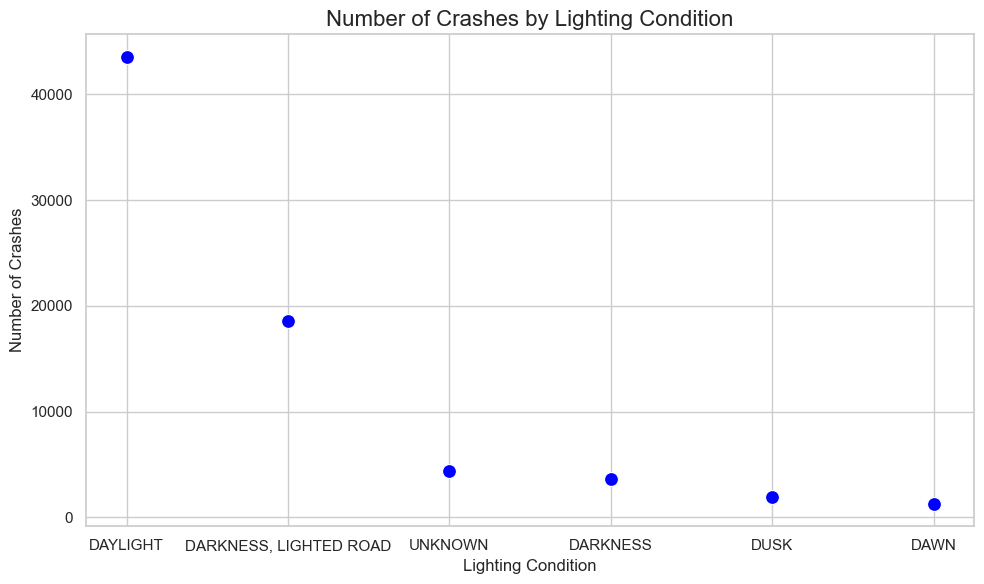

In [356]:
# Prepare the data for plotting
lighting_conditions = lighting_crash_counts.index
crash_counts = lighting_crash_counts.values

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lighting_conditions, y=crash_counts, s=100, color='blue', marker='o')

# Customize the plot
plt.title("Number of Crashes by Lighting Condition", fontsize=16)
plt.xlabel("Lighting Condition", fontsize=12)
plt.ylabel("Number of Crashes", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [357]:
# 7.Distribution of the Number of Crashes due to road defects

In [190]:
print(data['road_defect'].unique())

['NO DEFECTS' 'UNKNOWN' 'OTHER' 'WORN SURFACE' 'SHOULDER DEFECT'
 'RUT, HOLES' 'DEBRIS ON ROADWAY']


In [358]:
# Count crashes for each road defect type
road_defect_crash_counts = data['road_defect'].value_counts()

# Display the counts
print(road_defect_crash_counts)

road_defect
NO DEFECTS           54862
UNKNOWN              17469
OTHER                  373
WORN SURFACE           301
RUT, HOLES             275
SHOULDER DEFECT         68
DEBRIS ON ROADWAY       43
Name: count, dtype: int64


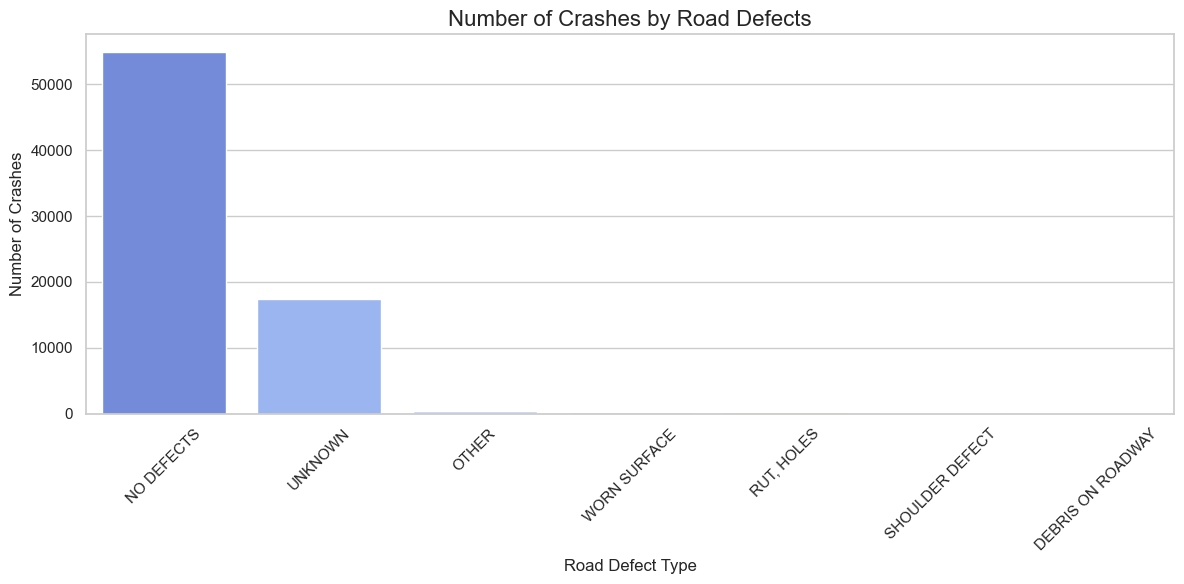

In [359]:
# Prepare the data for plotting
road_defects = road_defect_crash_counts.index
crash_counts = road_defect_crash_counts.values

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=road_defects, y=crash_counts, palette="coolwarm")

# Customize the chart
plt.title("Number of Crashes by Road Defects", fontsize=16)
plt.xlabel("Road Defect Type", fontsize=12)
plt.ylabel("Number of Crashes", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

In [360]:
# 8.Histogram for Damage cost incurred for Hit and Run accidents

In [361]:
# Filter for hit-and-run incidents
hit_and_run_data = data[data['hit_and_run_i'] == 'Y']  # Adjust column name as needed

# Display the filtered data
print(hit_and_run_data.head())

            crash_date  posted_speed_limit traffic_control_device  \
1  2023-07-29 14:45:00                  30         TRAFFIC SIGNAL   
10 2023-07-29 14:30:00                  10            NO CONTROLS   
11 2023-07-29 00:50:00                  30         TRAFFIC SIGNAL   
13 2023-09-20 16:45:00                  20            NO CONTROLS   
15 2023-09-20 12:57:00                  15            NO CONTROLS   

        device_condition weather_condition lighting_condition  \
1   FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
10           NO CONTROLS           UNKNOWN            UNKNOWN   
11  FUNCTIONING PROPERLY             CLEAR           DARKNESS   
13           NO CONTROLS             CLEAR           DAYLIGHT   
15           NO CONTROLS             CLEAR           DAYLIGHT   

                    trafficway_type           alignment roadway_surface_cond  \
1   DIVIDED - W/MEDIAN (NOT RAISED)  STRAIGHT AND LEVEL                  dry   
10                      PARKING LO

In [362]:
print(hit_and_run_data['damage'].unique())

['OVER $1,500' '$501 - $1,500' '$500 OR LESS']


In [363]:
# Replace non-numeric characters and convert invalid values to NaN
hit_and_run_data['damage_cleaned'] = hit_and_run_data['damage'].replace('[^\d.]', '', regex=True)

# Convert to float and handle invalid values
hit_and_run_data['damage_cleaned'] = pd.to_numeric(hit_and_run_data['damage_cleaned'], errors='coerce')

# Drop rows with NaN in 'damage_cleaned'
hit_and_run_data = hit_and_run_data.dropna(subset=['damage_cleaned'])

# Verify the cleaned data
print(hit_and_run_data['damage_cleaned'].head())

1        1500
10    5011500
11       1500
13       1500
15       1500
Name: damage_cleaned, dtype: int64


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ALL\AppData\Local\Temp\ipykernel_12484\4180285016.py:2: SyntaxWarning: invalid escape sequence '\d'
  hit_and_run_data['damage_cleaned'] = hit_and_run_data['damage'].replace('[^\d.]', '', regex=True)
C:\Users\ALL\AppData\Local\Temp\ipykernel_12484\4180285016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hit_and_run_data['damage_cleaned'] = hit_and_run_data['damage'].replace('[^\d.]', '', regex=True)
C:\Users\ALL\AppData\Local\Temp\ipykernel_12484\4180285016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [364]:
# Extract the damage cost column
damage_cost = hit_and_run_data['damage'] # Adjust column name as needed

# Display basic statistics
print(damage_cost.describe())

count           22410
unique              3
top       OVER $1,500
freq            15701
Name: damage, dtype: object


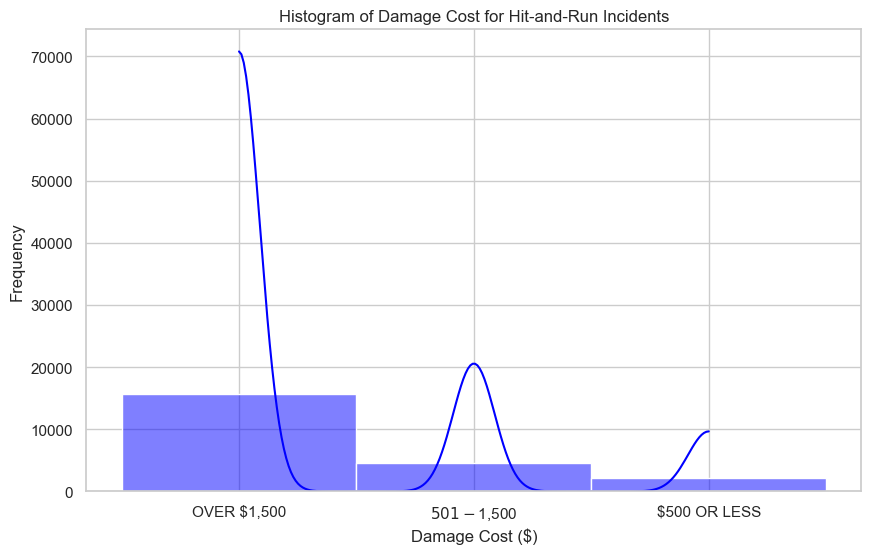

In [365]:
plt.figure(figsize=(10, 6))
sns.histplot(damage_cost, bins=30, kde=True, color='blue')
plt.title('Histogram of Damage Cost for Hit-and-Run Incidents')
plt.xlabel('Damage Cost ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [366]:
# 9.Distribution of Time difference between crash date and Police Notification date

In [367]:
# Convert columns to datetime
data['crash_date'] = pd.to_datetime(data['crash_date'])
data['date_police_notified'] = pd.to_datetime(data['date_police_notified'])

# Handle missing values (if any)
data = data.dropna(subset=['crash_date', 'date_police_notified'])

# Display the cleaned data
print(data[['crash_date', 'date_police_notified']].head())

           crash_date date_police_notified
0 2023-08-18 12:50:00  2023-08-18 12:55:00
1 2023-07-29 14:45:00  2023-07-29 14:45:00
2 2023-08-18 17:58:00  2023-08-18 18:01:00
3 2023-08-18 10:45:00  2023-08-18 10:48:00
4 2023-07-29 13:00:00  2023-07-29 13:46:00


In [368]:
# Extract the month from the crash date
data['CRASH_MONTH'] = data['crash_date'].dt.month

# Filter for June (month = 6)
june_data = data[data['CRASH_MONTH'] == 6]

# Display the filtered data
print(june_data[['crash_date', 'date_police_notified']].head())

             crash_date date_police_notified
69  2023-06-22 20:45:00  2023-06-22 20:49:00
86  2023-06-20 07:40:00  2023-06-20 07:52:00
93  2023-06-04 09:20:00  2023-06-04 09:25:00
116 2023-06-09 09:39:00  2023-06-09 09:39:00
276 2023-06-16 11:52:00  2023-06-16 11:54:00


In [369]:
# Calculate the time difference in hours (or days)
june_data['TIME_DIFFERENCE'] = (june_data['date_police_notified'] - june_data['crash_date']).dt.total_seconds() / 3600  # Convert to hours

# Display the time difference
print(june_data[['CRASH_MONTH', 'date_police_notified', 'TIME_DIFFERENCE']].head())

     CRASH_MONTH date_police_notified  TIME_DIFFERENCE
69             6  2023-06-22 20:49:00         0.066667
86             6  2023-06-20 07:52:00         0.200000
93             6  2023-06-04 09:25:00         0.083333
116            6  2023-06-09 09:39:00         0.000000
276            6  2023-06-16 11:54:00         0.033333


C:\Users\ALL\AppData\Local\Temp\ipykernel_12484\3476257077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june_data['TIME_DIFFERENCE'] = (june_data['date_police_notified'] - june_data['crash_date']).dt.total_seconds() / 3600  # Convert to hours


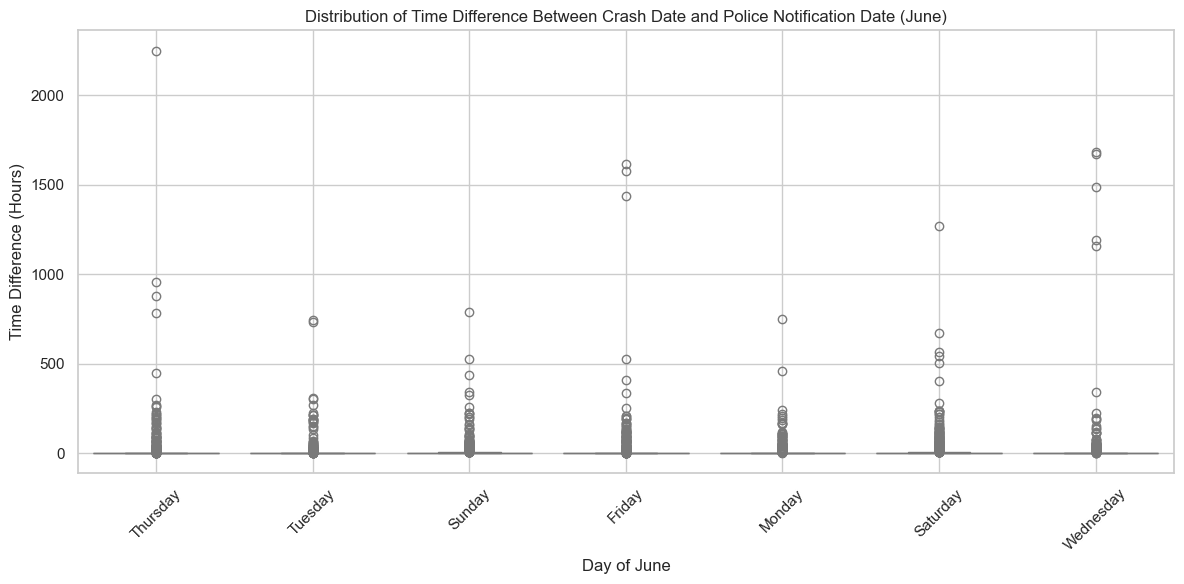

In [370]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(x='crash_day_of_week', y='TIME_DIFFERENCE', data=june_data, color='lightblue')

# Customize the plot
plt.title('Distribution of Time Difference Between Crash Date and Police Notification Date (June)')
plt.xlabel('Day of June')
plt.ylabel('Time Difference (Hours)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [371]:
# 10.Top 10 Primary contributary cause for collisions in Chicago

In [372]:
print(data['prim_contributory_cause'].value_counts().head())

prim_contributory_cause
UNABLE TO DETERMINE              29553
FAILING TO YIELD RIGHT-OF-WAY     8544
FOLLOWING TOO CLOSELY             6062
IMPROPER OVERTAKING/PASSING       4007
NOT APPLICABLE                    3882
Name: count, dtype: int64


In [373]:
# Count the frequency of each primary cause
cause_counts = data['prim_contributory_cause'].value_counts()

# Convert to a DataFrame for visualization
cause_counts_df = cause_counts.reset_index()
cause_counts_df.columns = ['prim_contributory_cause', 'Count']

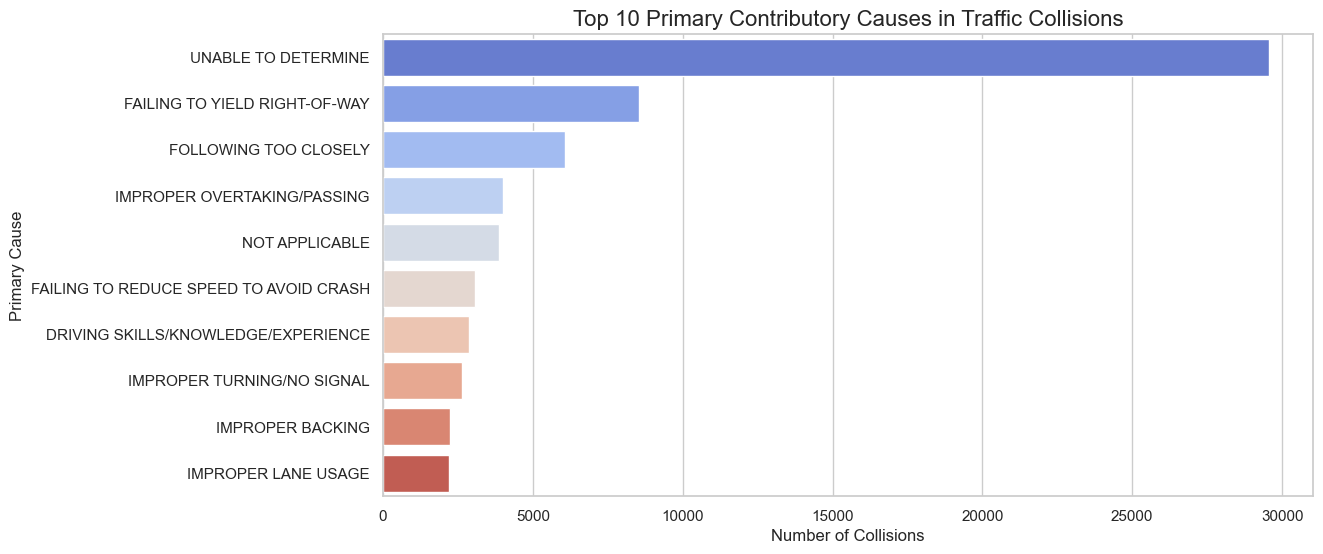

In [374]:
plt.figure(figsize=(12, 6))
sns.barplot(y='prim_contributory_cause', x='Count', data=cause_counts_df.head(10), palette="coolwarm")
plt.title("Top 10 Primary Contributory Causes in Traffic Collisions", fontsize=16)
plt.ylabel("Primary Cause", fontsize=12)
plt.xlabel("Number of Collisions", fontsize=12)
plt.show()

In [375]:
# 11.Distribution of injury types in Traffic collisions

In [376]:
# Summing up the values for each type of injury
injury_counts = {
    "Fatal Injuries": data['injuries_fatal'].sum(),
    "Incapacitating Injuries": data['injuries_incapacitating'].sum(),
    "Non-Incapacitating Injuries": data['injuries_non_incapacitating'].sum(),
    "Reported But Not Evident Injuries": data['injuries_reported_not_evident'].sum(),
    "No Indication of Injuries": data['injuries_no_indication'].sum()
}

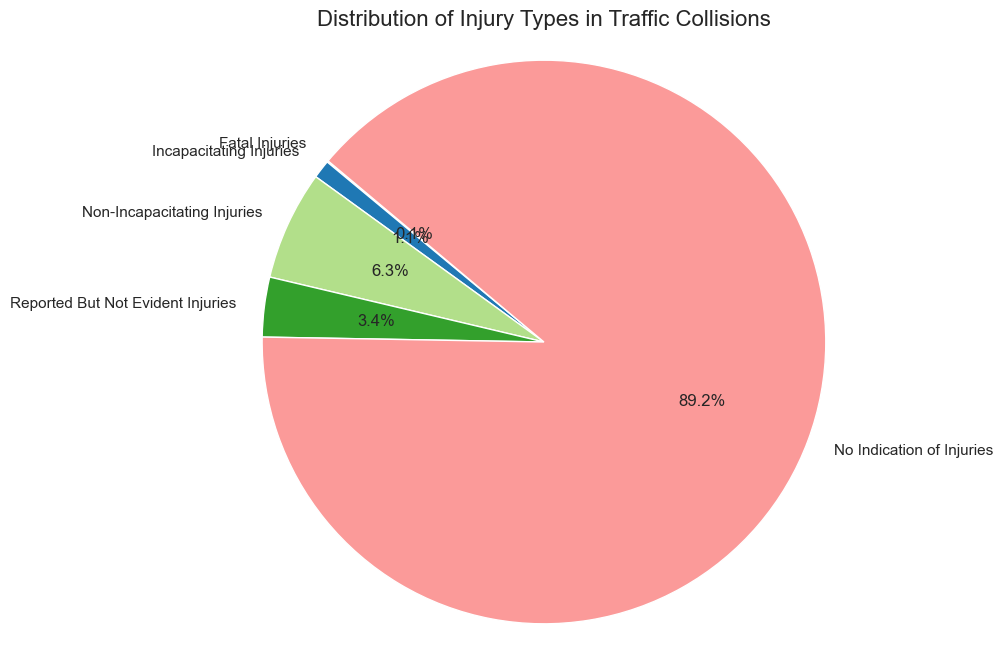

In [377]:
# Data for the pie chart
labels = injury_counts.keys()
sizes = injury_counts.values()
colors = plt.cm.Paired.colors  # Use a color palette

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Distribution of Injury Types in Traffic Collisions", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()

In [378]:
# 12. Top streets by Crash count and Road type in Chicago

In [379]:
# Check for missing values in relevant columns
print(data[['street_name', 'trafficway_type']].isnull().sum())

# Drop rows with missing STREET_NAME or ROAD_TYPE
data = data.dropna(subset=['street_name', 'trafficway_type'])

# Display the cleaned data
print(data[['street_name', 'trafficway_type']].head())

street_name        0
trafficway_type    0
dtype: int64
       street_name                  trafficway_type
0     OHARE STREET                            OTHER
1   ASHLAND AVENUE  DIVIDED - W/MEDIAN (NOT RAISED)
2      LONG AVENUE                      NOT DIVIDED
3  TERMINAL STREET                            OTHER
4   LA SALLE DRIVE                      NOT DIVIDED


In [380]:
# Count the frequency of each road type
road_type_counts = data['trafficway_type'].value_counts()

# Display the road type distribution
print(road_type_counts)

trafficway_type
NOT DIVIDED                        29314
FOUR WAY                            9827
DIVIDED - W/MEDIAN (NOT RAISED)     9547
ONE-WAY                             8270
PARKING LOT                         4338
DIVIDED - W/MEDIAN BARRIER          3938
OTHER                               2004
T-INTERSECTION                      1876
ALLEY                               1259
UNKNOWN                              983
CENTER TURN LANE                     435
UNKNOWN INTERSECTION TYPE            348
RAMP                                 251
DRIVEWAY                             226
Y-INTERSECTION                       205
FIVE POINT, OR MORE                  204
TRAFFIC ROUTE                        178
NOT REPORTED                         128
ROUNDABOUT                            41
L-INTERSECTION                        19
Name: count, dtype: int64


In [381]:
# Group crashes by STREET_NAME and ROAD_TYPE
street_road_type = data.groupby(['street_name', 'trafficway_type']).size().reset_index(name='CRASH_COUNT')

# Sort by crash count in descending order
street_road_type = street_road_type.sort_values(by='CRASH_COUNT', ascending=False)

# Display the top 10 streets with the most crashes
print(street_road_type.head(10))

              street_name                  trafficway_type  CRASH_COUNT
5527         PULASKI ROAD                      NOT DIVIDED          899
6537   WESTREETERN AVENUE                      NOT DIVIDED          812
3770        KEDZIE AVENUE                      NOT DIVIDED          708
2068        CICERO AVENUE                      NOT DIVIDED          699
3227   HALSTREETED STREET                      NOT DIVIDED          577
1404       ASHLAND AVENUE                      NOT DIVIDED          477
6532   WESTREETERN AVENUE  DIVIDED - W/MEDIAN (NOT RAISED)          440
4077  LAKE SHORE DRIVE NB       DIVIDED - W/MEDIAN BARRIER          433
5522         PULASKI ROAD  DIVIDED - W/MEDIAN (NOT RAISED)          420
2063        CICERO AVENUE  DIVIDED - W/MEDIAN (NOT RAISED)          404


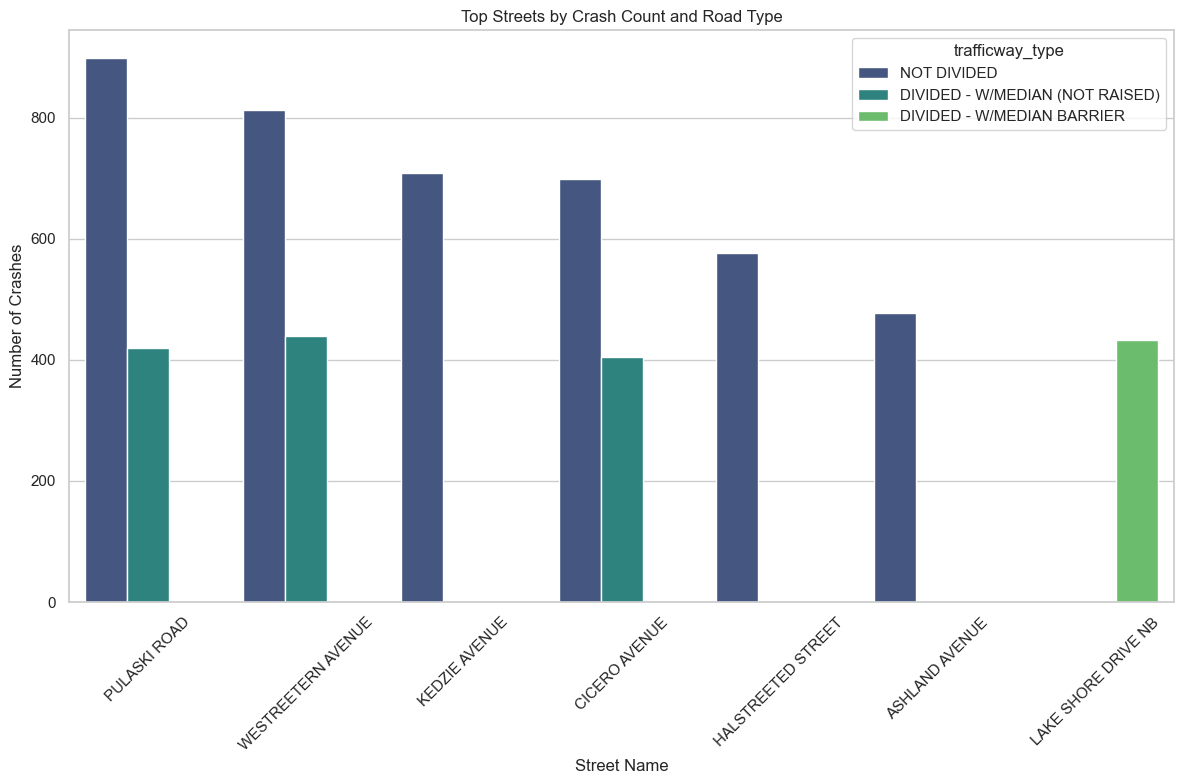

In [382]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Filter for top N streets (e.g., top 10)
top_streets = street_road_type.head(10)

# Create a bar chart
sns.barplot(x='street_name', y='CRASH_COUNT', hue='trafficway_type', data=top_streets, palette='viridis')

# Customize the plot
plt.title('Top Streets by Crash Count and Road Type')
plt.xlabel('Street Name')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [383]:
# 13.Heat Map for weather condition and Severity Levels

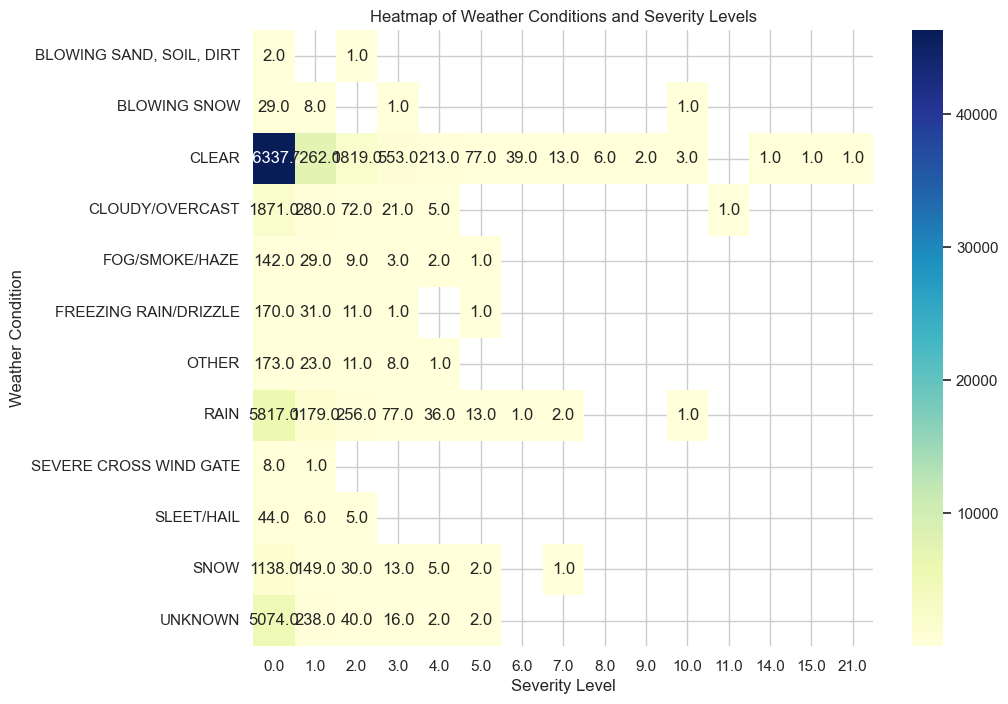

In [384]:
pivot_table = data.pivot_table(index='weather_condition', columns='injuries_total', values='injuries_fatal', aggfunc='count')

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt= '{:.2f}'.format(3.14159), cmap='YlGnBu')
plt.title('Heatmap of Weather Conditions and Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Weather Condition')
plt.show()

In [385]:
# 14. Distribution of Number of Crashes by Device Condition

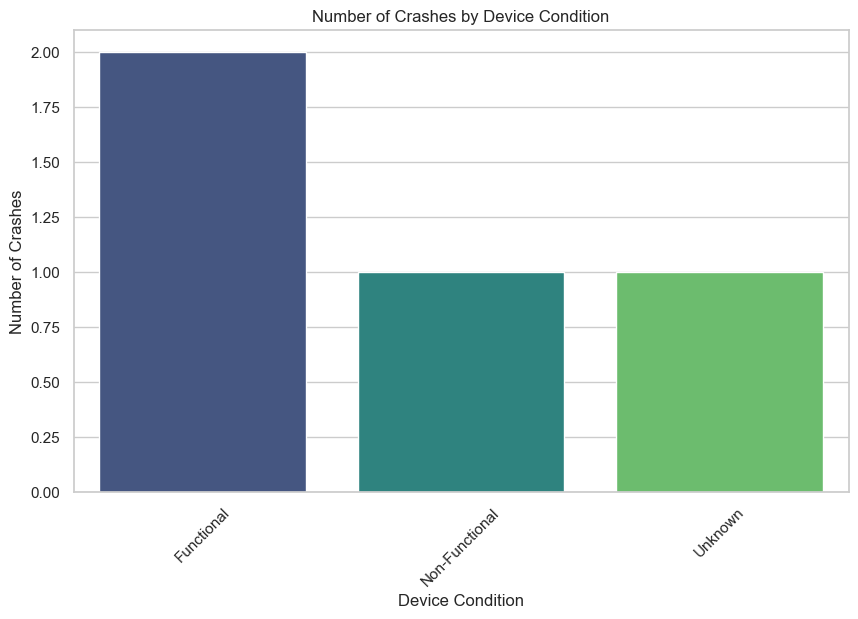

In [386]:
# Sample data
d = {'device_condition': ['Functional', 'Non-Functional', 'Unknown', 'Functional'],
        'Crash_ID': [1, 2, 3, 4]}
data= pd.DataFrame(d)

# Count crashes by device condition
crash_counts = data.groupby('device_condition').size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=crash_counts, x='device_condition', y='Count', palette='viridis')
plt.title('Number of Crashes by Device Condition')
plt.xlabel('Device Condition')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

In [387]:
# 15.Proportion of Crashes by Road Alignment

In [389]:
# Sample data
data = {'alignment': ['Straight', 'Curved', 'Uphill', 'Downhill', 'Straight'],
        'Crash_ID': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Group data
crash_counts = df.groupby('alignment').size().reset_index(name='Count')

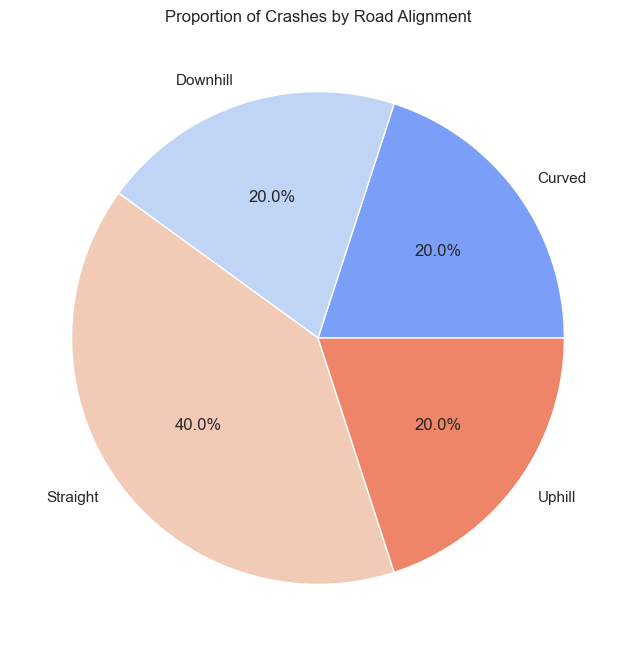

In [390]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(crash_counts['Count'], labels=crash_counts['alignment'], autopct='%1.1f%%', 
        colors=sns.color_palette('coolwarm', len(crash_counts)))
plt.title('Proportion of Crashes by Road Alignment')
plt.show()

In [401]:
import pandas as pd

In [402]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [403]:
data=pd.read_csv("C:\\Users\\ALL\\Desktop\\JN\\tra1.csv",low_memory=False)

In [404]:
import matplotlib.pyplot as plt
import seaborn as sns

In [405]:
# Convert the collision_date column to datetime
data["crash_date"] = pd.to_datetime(data["crash_date"])

In [406]:
# 16.Top 5 beat of Occurrence in Street Direction over time in Chicago

In [407]:
# Group by beat, street direction, and date
collisions_by_beat_direction = data.groupby(
    [data['crash_date'].dt.to_period('M'), 'beat_of_occurrence', 'street_direction']
).size().reset_index(name='collision_count')

# Convert the date back to datetime for plotting
collisions_by_beat_direction['crash_date'] = collisions_by_beat_direction['crash_date'].dt.to_timestamp()

# Display the aggregated data
print(collisions_by_beat_direction.head())

  crash_date  beat_of_occurrence street_direction  collision_count
0 2023-01-01               111.0             EAST                5
1 2023-01-01               111.0            NORTH               10
2 2023-01-01               111.0             WEST                2
3 2023-01-01               112.0             EAST                1
4 2023-01-01               112.0            NORTH                2


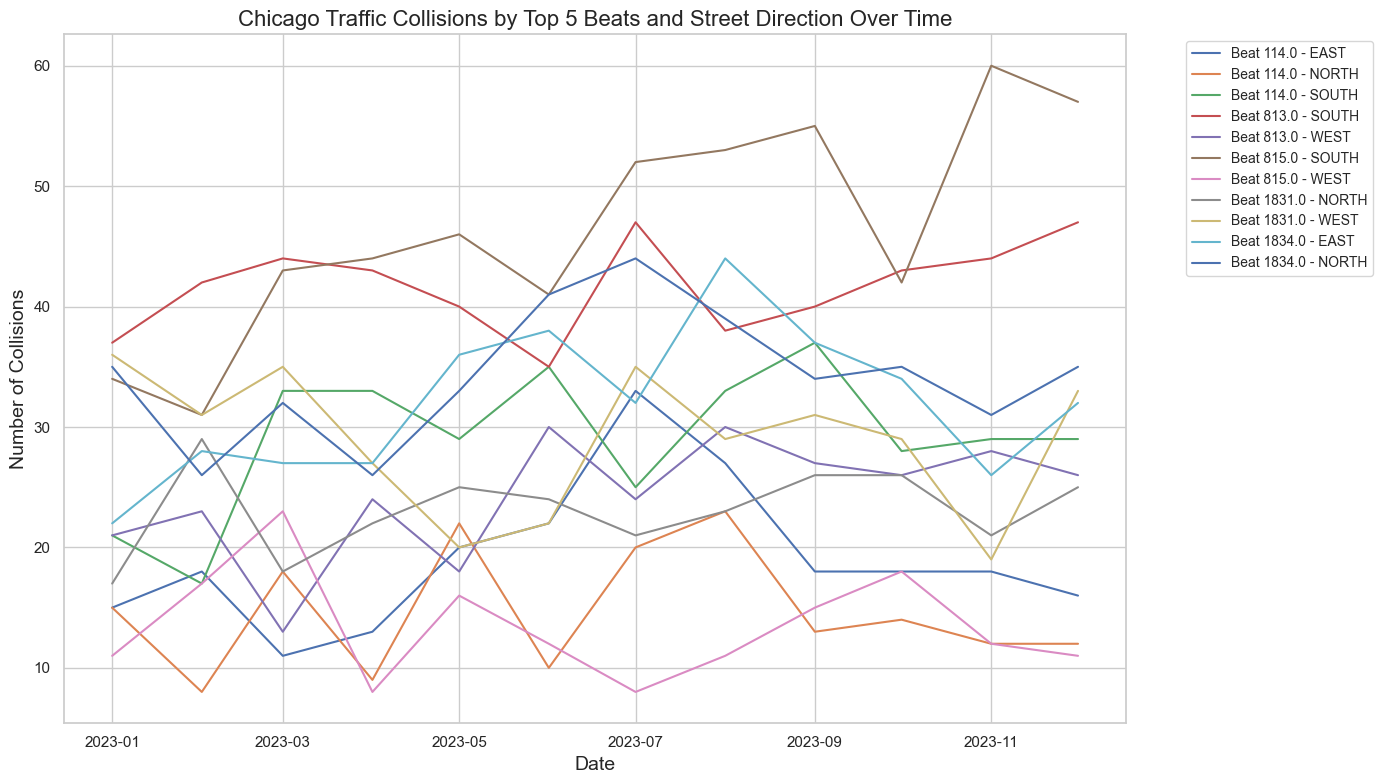

In [408]:
# Get the top 5 beats with the most collisions
top_beats = data['beat_of_occurrence'].value_counts().nlargest(5).index

# Filter the data for top beats
filtered_data = collisions_by_beat_direction[
    collisions_by_beat_direction['beat_of_occurrence'].isin(top_beats)
]

# Pivot the filtered data
pivot_filtered_data = filtered_data.pivot_table(
    index='crash_date',
    columns=['beat_of_occurrence', 'street_direction'],
    values='collision_count',
    fill_value=0
)

# Plot the filtered data
plt.figure(figsize=(14, 8))
for column in pivot_filtered_data.columns:
    plt.plot(pivot_filtered_data.index, pivot_filtered_data[column], label=f"Beat {column[0]} - {column[1]}")

# Add labels and title
plt.title("Chicago Traffic Collisions by Top 5 Beats and Street Direction Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Collisions", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [409]:
# 17.Top 10 Secondary Contributary Causes for Collisions in Chicago

In [410]:
# Count the frequency of each secondary cause
cause_counts = data['sec_contributory_cause'].value_counts().reset_index()
cause_counts.columns = ['sec_contributory_cause', 'collision_count']

# Display the aggregated data
print(cause_counts.head())

                   sec_contributory_cause  collision_count
0                          NOT APPLICABLE            31000
1                     UNABLE TO DETERMINE            25762
2           FAILING TO YIELD RIGHT-OF-WAY             2781
3     DRIVING SKILLS/KNOWLEDGE/EXPERIENCE             2399
4  FAILING TO REDUCE SPEED TO AVOID CRASH             2298


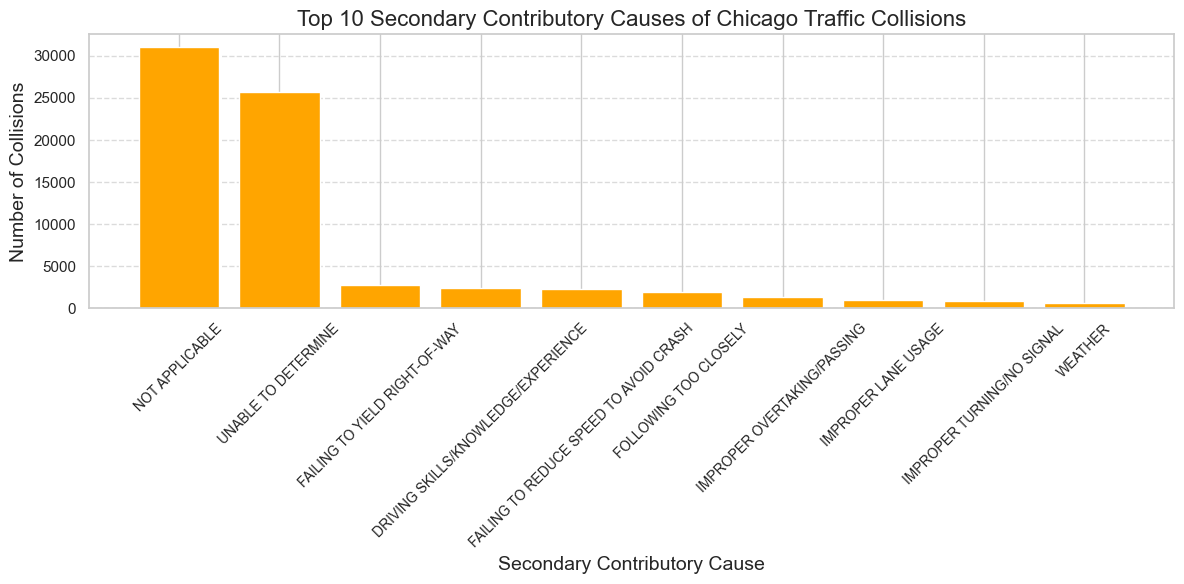

In [411]:

# Get the top 10 secondary causes
top_causes = cause_counts.head(10)

# Create the bar plot for top 10 causes
plt.figure(figsize=(12, 6))
plt.bar(top_causes['sec_contributory_cause'], top_causes['collision_count'], color='orange')

# Add labels and title
plt.title("Top 10 Secondary Contributory Causes of Chicago Traffic Collisions", fontsize=16)
plt.xlabel("Secondary Contributory Cause", fontsize=14)
plt.ylabel("Number of Collisions", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Add grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [412]:
#18.Distribution of Report type for collisions in Chicago

In [413]:
# Count the frequency of each report type
report_type_counts = data['report_type'].value_counts().reset_index()
report_type_counts.columns = ['report_type', 'collision_count']

# Display the aggregated data
print(report_type_counts)

                  report_type  collision_count
0                    ON SCENE            36838
1  NOT ON SCENE (DESK REPORT)            33573
2                     Unknown             2980


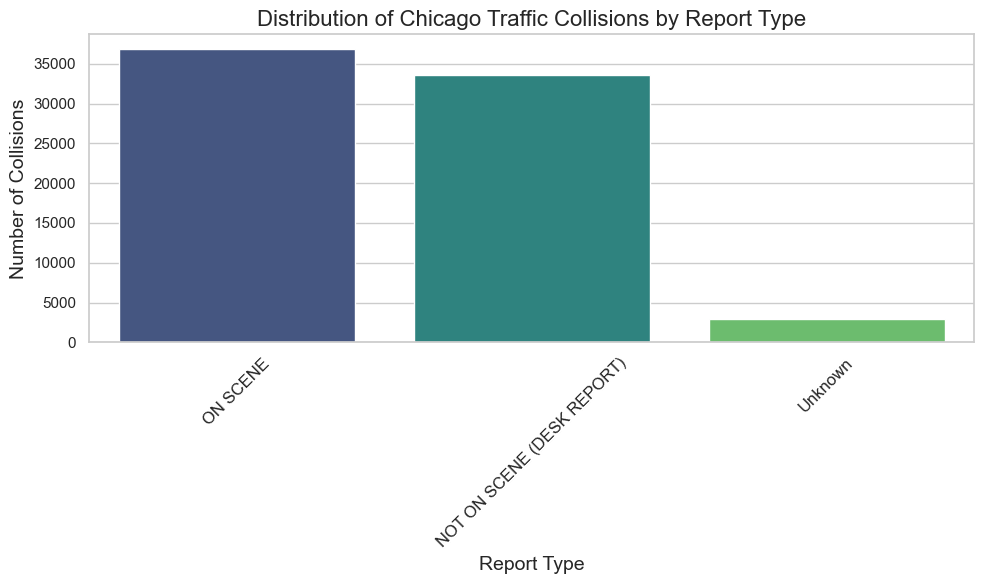

In [414]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='report_type', order=data['report_type'].value_counts().index, palette="viridis")

# Add labels and title
plt.title("Distribution of Chicago Traffic Collisions by Report Type", fontsize=16)
plt.xlabel("Report Type", fontsize=14)
plt.ylabel("Number of Collisions", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [415]:
# 19. Number of Collisions in dark and wet conditions in Chicago

In [416]:
# Filter for dark lighting conditions
dark_conditions = ["DARKNESS", "DARK", "DARK LIGHTS ON", "DARK NO LIGHTS"]
data_dark = data[data['lighting_condition'].isin(dark_conditions)]

# Filter for wet road surface conditions
data_dark_wet = data_dark[data_dark['roadway_surface_cond'] == "WET"]

# Display the filtered data
print(data_dark_wet.head())

             crash_date  posted_speed_limit traffic_control_device  \
38  2023-09-21 21:00:00                  25            NO CONTROLS   
198 2023-08-06 02:30:00                  30         TRAFFIC SIGNAL   
349 2023-08-14 21:04:00                  30         TRAFFIC SIGNAL   
460 2023-06-13 13:20:00                  20            NO CONTROLS   
509 2023-01-31 21:40:00                  30         TRAFFIC SIGNAL   

         device_condition weather_condition lighting_condition  \
38            NO CONTROLS              RAIN           DARKNESS   
198  FUNCTIONING PROPERLY              RAIN           DARKNESS   
349  FUNCTIONING PROPERLY              RAIN           DARKNESS   
460           NO CONTROLS              RAIN           DARKNESS   
509  FUNCTIONING PROPERLY             CLEAR           DARKNESS   

    trafficway_type           alignment roadway_surface_cond road_defect  ...  \
38      PARKING LOT  STRAIGHT AND LEVEL                  WET     UNKNOWN  ...   
198        FOUR WAY 

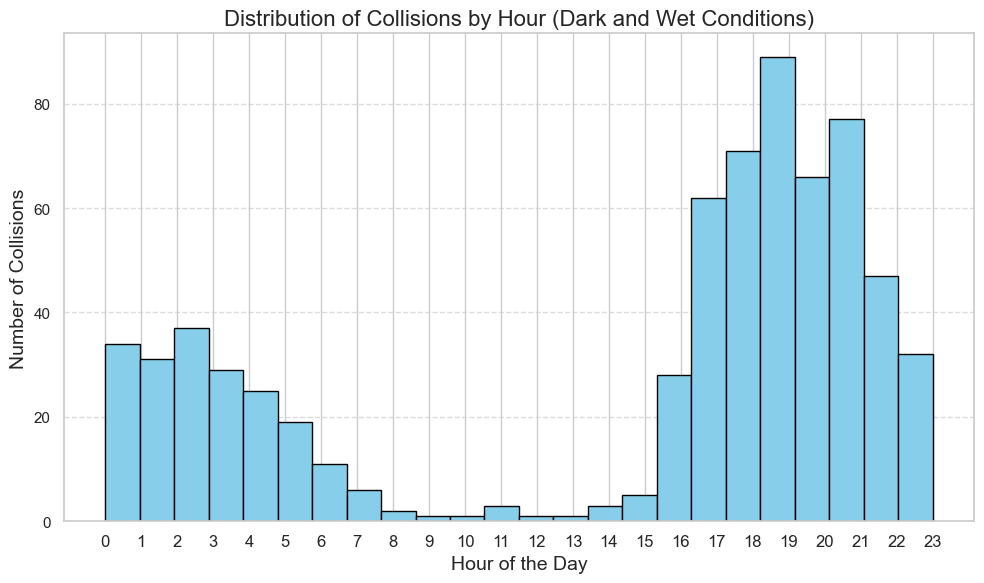

In [417]:
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(data_dark_wet['crash_hour'], bins=24, color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Distribution of Collisions by Hour (Dark and Wet Conditions)", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Number of Collisions", fontsize=14)

# Customize x-axis ticks to show all hours
plt.xticks(range(24), fontsize=12)

# Add grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [418]:
# 20.Number of Collisions by Posted speed limit 

In [419]:
# Count the number of collisions by posted speed limit
collisions_by_speed_limit = data['posted_speed_limit'].value_counts().reset_index()
collisions_by_speed_limit.columns = ['posted_speed_limit', 'collision_count']

# Calculate the average number of injuries by posted speed limit
injuries_by_speed_limit = data.groupby('posted_speed_limit')['injuries_total'].mean().reset_index()
injuries_by_speed_limit.columns = ['posted_speed_limit', 'average_injuries']

# Display the aggregated data
print(collisions_by_speed_limit.head())
print(injuries_by_speed_limit.head())

   posted_speed_limit  collision_count
0                  30            54537
1                  35             4822
2                  25             4753
3                  20             3050
4                  15             2655
   posted_speed_limit  average_injuries
0                   0          0.184466
1                   1          0.000000
2                   2          0.000000
3                   3          0.200000
4                   5          0.078534


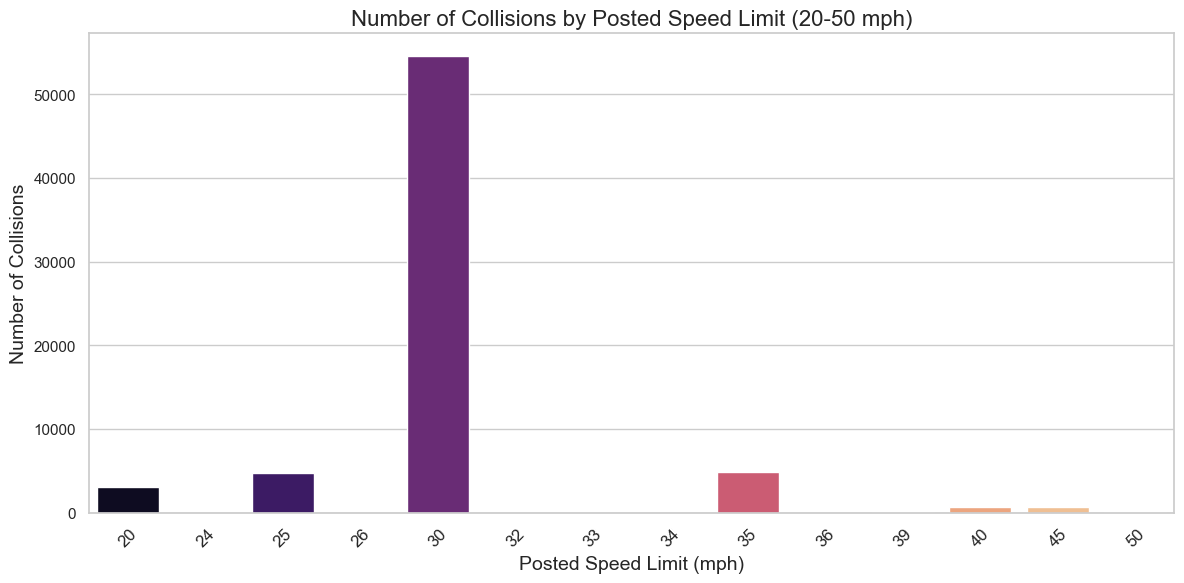

In [420]:
# Filter data for speed limits between 20 and 50 mph
filtered_data = collisions_by_speed_limit[
    (collisions_by_speed_limit['posted_speed_limit'] >= 20) & 
    (collisions_by_speed_limit['posted_speed_limit'] <= 50)
]

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='posted_speed_limit', y='collision_count', palette="magma")

# Add labels and title
plt.title("Number of Collisions by Posted Speed Limit (20-50 mph)", fontsize=16)
plt.xlabel("Posted Speed Limit (mph)", fontsize=14)
plt.ylabel("Number of Collisions", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()